<a href="https://colab.research.google.com/github/NicolasKlaue/Perceptron-to-classify-iris-types/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [275]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

np.random.seed(2000)
iris = datasets.load_iris()
print(iris.target_names)
print(np.bincount(iris.target))
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
[50 50 50]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


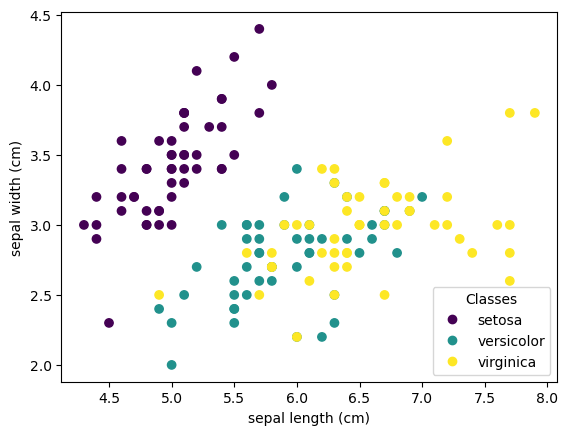

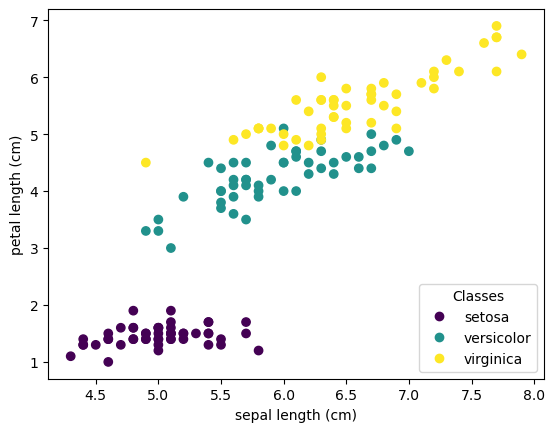

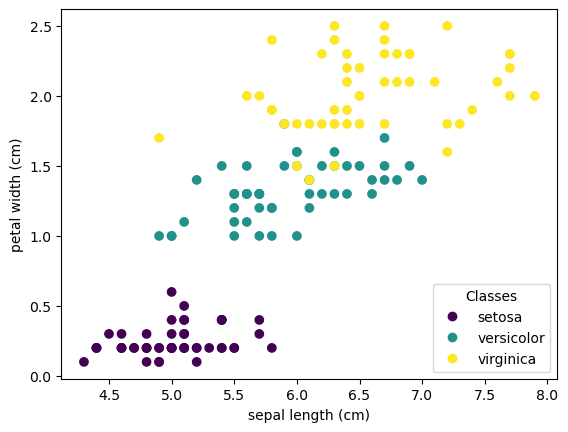

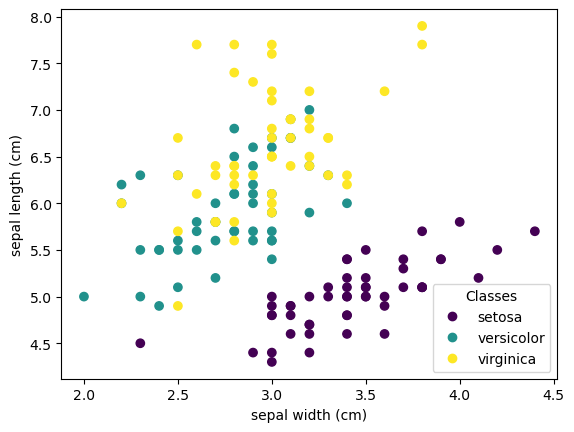

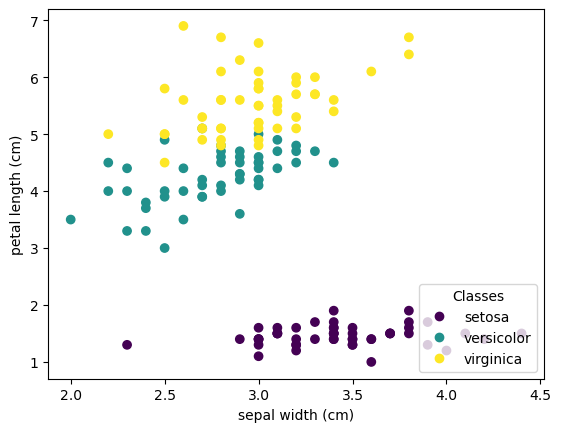

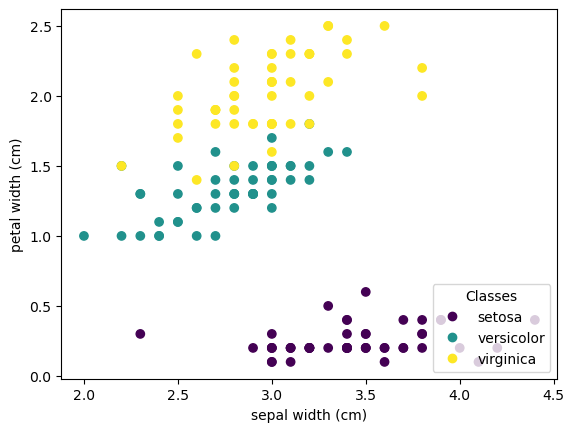

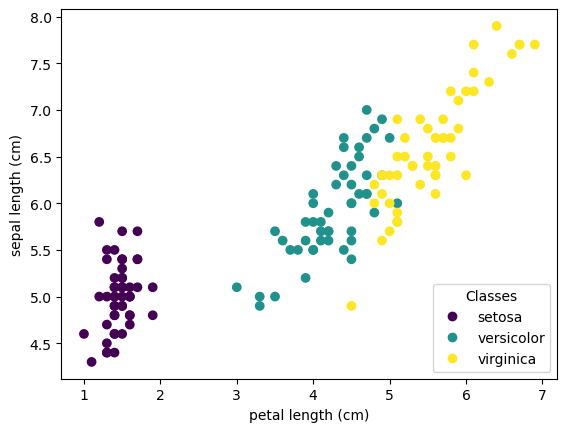

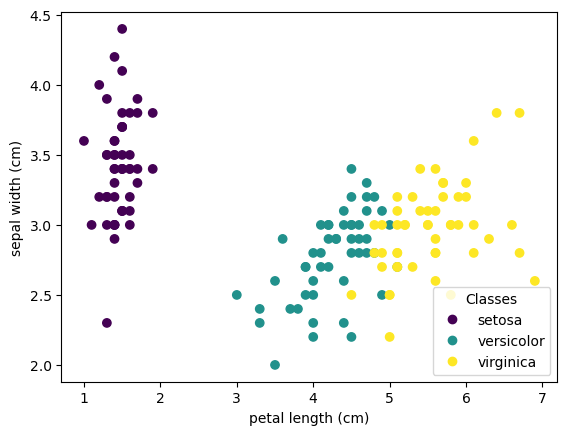

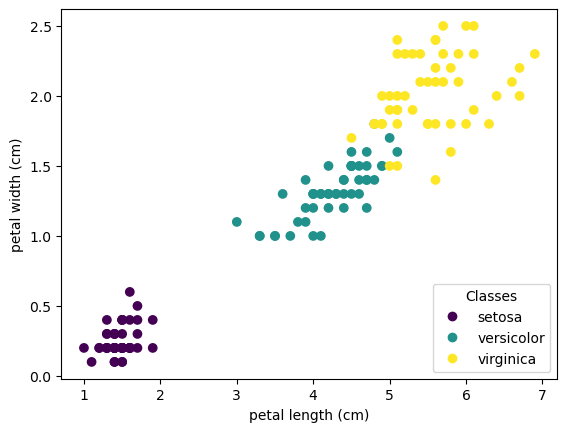

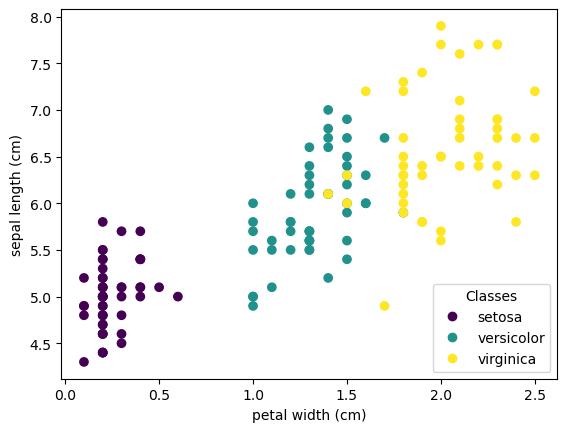

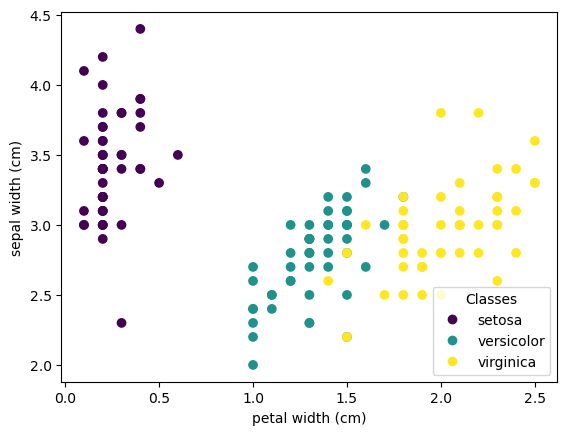

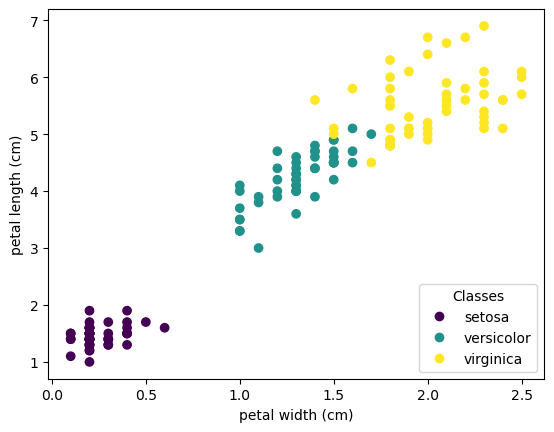

In [276]:
import matplotlib.pyplot as plt

for i in range(4):
  for j in range(4):
    if i != j:
      _, ax = plt.subplots()
      scatter = ax.scatter(
          iris.data[:, i], iris.data[:, j], c=iris.target)
      ax.set(xlabel=iris.feature_names[i],
             ylabel=iris.feature_names[j])
      _ = ax.legend(
          scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
        )

In [277]:
data, labels = iris.data, iris.target
#We have choosen to eliminate versicolor as we can only classify between two classes in a perceptron and Setosa and virginica are the easiest to classify based on petal width and lenght
versicolor_index = np.where(iris.target_names == "versicolor")[0][0]
filtered_data = [data[i] for i in range(len(data)) if labels[i] not in [versicolor_index]]
filtered_labels = [labels[i] for i in range(len(labels)) if labels[i] not in [versicolor_index]]

#Guarantee dimensionality of x is correct
filtered_data = [filtered_data[i][2:] for i in range(len(filtered_data))]


filtered_labels = [0 if label == 0 else 1 for label in filtered_labels]

#Division
setosa_index =0
setosa_filtered_data = [filtered_data[i] for i in range(len(filtered_data)) if labels[i] in [setosa_index]]
setosa_filtered_labels = [filtered_labels[i] for i in range(len(filtered_labels)) if labels[i] in [setosa_index]]
setosa_filtered_data = np.array(setosa_filtered_data, dtype=np.float32)
setosa_filtered_labels = np.expand_dims(np.array(setosa_filtered_labels, dtype=np.float32), axis=1)


virginica_index = 1
virginica_filtered_data = [filtered_data[i] for i in range(len(filtered_data)) if labels[i] in [virginica_index]]
virginica_filtered_labels = [filtered_labels[i] for i in range(len(filtered_labels)) if labels[i] in [virginica_index]]
virginica_filtered_data = np.array(virginica_filtered_data, dtype=np.float32)
virginica_filtered_labels = np.expand_dims(np.array(virginica_filtered_labels, dtype=np.float32), axis=1)

train_split, test_split = 0.7, 0.3
setosa_X_train, setosa_X_test = np.split(setosa_filtered_data, [int(setosa_filtered_data.shape[0] * train_split)])
setosa_y_train, setosa_y_test = np.split(setosa_filtered_labels, [int(setosa_filtered_labels.shape[0] * train_split)])

virginica_X_train, virginica_X_test = np.split(virginica_filtered_data, [int(virginica_filtered_data.shape[0] * train_split)])
virginica_y_train, virginica_y_test = np.split(virginica_filtered_labels, [int(virginica_filtered_labels.shape[0] * train_split)])

#print(len(setosa_filtered_data))
#print(len(setosa_filtered_labels))
#print(len(virginica_filtered_data))
#print(len(virginica_filtered_labels))
#print("setosa_X_train shape:", setosa_X_train.shape)
#print("setosa_X_train type:", type(setosa_X_train))
#print("setosa_X_test shape:", setosa_X_test.shape)
#print("setosa_X_test type:", type(setosa_X_test))
#print("setosa_y_train shape:", setosa_y_train.shape)
#print("setosa_y_train type:", type(setosa_y_train))
#print("setosa_y_test shape:", setosa_y_test.shape)
#print("setosa_y_test type:", type(setosa_y_test))
#print("virginica_X_train shape:", virginica_X_train.shape)
#print("virginica_X_train type:", type(virginica_X_train))
#print("virginica_X_test shape:", virginica_X_test.shape)
#print("virginica_X_test type:", type(virginica_X_test))
#print("virginica_y_train shape:", virginica_y_train.shape)
#print("virginica_y_train type:", type(virginica_y_train))
#print("virginica_y_test shape:", virginica_y_test.shape)
#print("virginica_y_test type:", type(virginica_y_test))

In [278]:
X_test, X_train = np.concatenate([setosa_X_test,virginica_X_test],0),np.concatenate([setosa_X_train,virginica_X_train],0)
y_test, y_train = np.concatenate([setosa_y_test,virginica_y_test],0),np.concatenate([setosa_y_train,virginica_y_train],0)
#print("X_train shape:", X_train.shape)
#print("X_train type:", type(X_train))
#print("X_test shape:", X_test.shape)
#print("X_test type:", type(X_test))
#print("y_train shape:", y_train.shape)
#print("y_train type:", type(y_train))
#print("y_test shape:", y_test.shape)
#print("y_test type:", type(y_test))

In [279]:
class Step:

  def __init__(
          self,
          threshold=0):

    self.__threshold__ = threshold

  def transform(
          self,
          x):

    return 1 if x >= self.__threshold__ else 0


class Perceptron:

     def __init__(self, units, activation):
        self.weights = np.random.normal(size=(units, 1)).astype(np.float32)
        self.bias = np.zeros(1, dtype=np.float32)
        self.activation = activation

     def predict(
          self,
          X):

          X = np.reshape(X, (self.weights.shape[1], self.weights.shape[0]))

          linear_output = np.zeros((X.shape[0], 1), dtype=np.float32)
          for i in range(X.shape[0]):
               for j in range(X.shape[1]):
                    linear_output[i] += X[i][j] * self.weights[j]
               linear_output[i] += self.bias


          prediction = self.activation.transform(linear_output)

          return prediction

     def fit(
          self,
          X,
          y,
          epochs=10,
          learning_rate=0.01):

          for epoch in range(1, epochs):

               loss = 0

               for i in range(X.shape[0]):

                    sample = np.reshape(
                         X[i], (self.weights.shape[0], self.weights.shape[1]))

                    prediction = self.predict(sample)
                    error = y[i] - prediction
                    loss += abs(error)

                    # Compute deltas
                    dweights = learning_rate * error * sample
                    dbias = learning_rate * error
                    i_weigths = self.weights
                    self.weights += dweights
                    self.bias += dbias

                    loss /= X.shape[0]
                    print("epoch \t | iteration\t | Input\t\t\t | Initial weights\t\t | Y\t | t\t | Error\t | Final weights")
                    if (len(self.weights) == 2):
                         print(str(epoch) + "\t | " + str(i) + "\t\t | " + str(sample[0]) + str(sample[1]) + "\t | " + str(i_weigths[0]) + str(i_weigths[1]) + "\t | " + str(prediction) + "\t | " + str(y[i]) + "\t | " + str(error) + "\t | " + str(self.weights[0]) + str(self.weights[1]))
                    if (len(self.weights) == 3):
                         print(str(epoch) + "\t | " + str(i) + "\t\t | " + str(sample[0]) + str(sample[1]) + str(sample[2]) + "\t | " + str(i_weigths[0]) + str(i_weigths[1]) + str(i_weigths[2]) + "\t | " + str(prediction) + "\t | " + str(y[i]) + "\t | " + str(error) + "\t | " + str(self.weights[0]) + str(self.weights[1]) + str(self.weights[2]))
               if (epoch % 10) == 0 or (epoch == epochs - 1):
                    print(f"Epoch {epoch} with loss {loss}")

In [280]:
input_size = X_test.shape[1]
output_size = y_test.shape[1]

learning_rate = 0.01

perceptron = Perceptron(
    units=input_size,
    activation=Step())

perceptron.fit(
    X_train,
    y_train,
    epochs=60,
    learning_rate=learning_rate)

epoch 	 | iteration	 | Input			 | Initial weights		 | Y	 | t	 | Error	 | Final weights
1	 | 0		 | [1.4][0.2]	 | [1.7227376][1.895914]	 | 1	 | [0.]	 | [-1.]	 | [1.7227376][1.895914]
epoch 	 | iteration	 | Input			 | Initial weights		 | Y	 | t	 | Error	 | Final weights
1	 | 1		 | [1.4][0.2]	 | [1.7087375][1.893914]	 | 1	 | [0.]	 | [-1.]	 | [1.7087375][1.893914]
epoch 	 | iteration	 | Input			 | Initial weights		 | Y	 | t	 | Error	 | Final weights
1	 | 2		 | [1.3][0.2]	 | [1.6957375][1.891914]	 | 1	 | [0.]	 | [-1.]	 | [1.6957375][1.891914]
epoch 	 | iteration	 | Input			 | Initial weights		 | Y	 | t	 | Error	 | Final weights
1	 | 3		 | [1.5][0.2]	 | [1.6807375][1.889914]	 | 1	 | [0.]	 | [-1.]	 | [1.6807375][1.889914]
epoch 	 | iteration	 | Input			 | Initial weights		 | Y	 | t	 | Error	 | Final weights
1	 | 4		 | [1.4][0.2]	 | [1.6667374][1.8879141]	 | 1	 | [0.]	 | [-1.]	 | [1.6667374][1.8879141]
epoch 	 | iteration	 | Input			 | Initial weights		 | Y	 | t	 | Error	 | Final weights
1	 | 5

In [281]:
for i in range(X_train.shape[0]):
  result = perceptron.predict(X_train[i])
  print(str(int(X_train[i][0])) + ' and ' + str(int(X_train[i][1])) + " = " + str(result)  + " expected = " + str(y_train[i][0]))

1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
6 and 2 = 1 expected = 1.0
5 and 1 = 1 expected = 1.0
5

In [282]:
for i in range(X_test.shape[0]):

  result = perceptron.predict(X_test[i])

  input = X_test[i]
  result = "1" if result > 0.5 else "0"

  print(str(int(input[0])) + ' and ' + str(int(input[1])) + " = " + result + " expected = " + str(y_test[i][0]))

1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 1 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
1 and 0 = 0 expected = 0.0
6 and 2 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 1 = 1 expected = 1.0
4 and 1 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 1 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 1 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 2 = 1 expected = 1.0
5 and 1 = 1 expected = 1.0


[Text(0.5, 0, 'petal length (cm)'), Text(0, 0.5, 'petal width (cm)')]

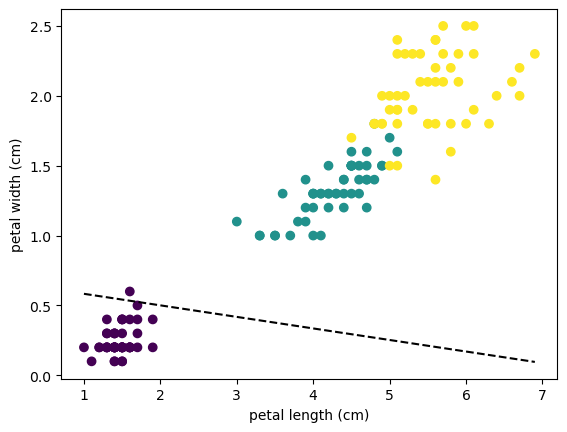

In [301]:
w = perceptron.weights
b = perceptron.bias
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)

x_values = np.linspace(iris.data[:, 2].min(), iris.data[:, 2].max())
y_values = -(w[0] * x_values + b) / w[1]
plt.plot(x_values, y_values, linestyle="--", color='black')

ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])

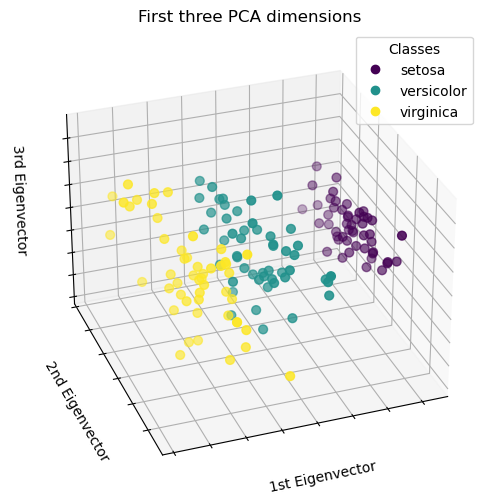

In [302]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

# Add the legend
labels = iris.target_names
ax = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="upper right", title="Classes"
)
plt.show()

# Explanation of the three-input perceptron
As we have made a transformation that joins all the previous inputs we will try to make a perceptron with these inputs

As we can see the most obvious separation is between setosa and virginica so this is th eone that we will be making

In [303]:
data, labels = iris.data, iris.target
#We have choosen to eliminate versicolor as we can only classify between two classes in a perceptron and Setosa and virginica are the easiest to classify based on petal width and lenght
versicolor_index = np.where(iris.target_names == "versicolor")[0][0]
filtered_data = [data[i] for i in range(len(data)) if labels[i] not in [versicolor_index]]
filtered_labels = [labels[i] for i in range(len(labels)) if labels[i] not in [versicolor_index]]

#print(data)
filtered_data = [filtered_data[i][[0,2,3]] for i in range(len(filtered_data))]
print(filtered_data)


filtered_labels = [0 if label == 0 else 1 for label in filtered_labels]

#Division
setosa_index =0
setosa_filtered_data = [filtered_data[i] for i in range(len(filtered_data)) if labels[i] in [setosa_index]]
setosa_filtered_labels = [filtered_labels[i] for i in range(len(filtered_labels)) if labels[i] in [setosa_index]]
setosa_filtered_data = np.array(setosa_filtered_data, dtype=np.float32)
setosa_filtered_labels = np.expand_dims(np.array(setosa_filtered_labels, dtype=np.float32), axis=1)


virginica_index = 1
virginica_filtered_data = [filtered_data[i] for i in range(len(filtered_data)) if labels[i] in [virginica_index]]
virginica_filtered_labels = [filtered_labels[i] for i in range(len(filtered_labels)) if labels[i] in [virginica_index]]
virginica_filtered_data = np.array(virginica_filtered_data, dtype=np.float32)
virginica_filtered_labels = np.expand_dims(np.array(virginica_filtered_labels, dtype=np.float32), axis=1)

train_split, test_split = 0.7, 0.3
setosa_X_train, setosa_X_test = np.split(setosa_filtered_data, [int(setosa_filtered_data.shape[0] * train_split)])
setosa_y_train, setosa_y_test = np.split(setosa_filtered_labels, [int(setosa_filtered_labels.shape[0] * train_split)])

virginica_X_train, virginica_X_test = np.split(virginica_filtered_data, [int(virginica_filtered_data.shape[0] * train_split)])
virginica_y_train, virginica_y_test = np.split(virginica_filtered_labels, [int(virginica_filtered_labels.shape[0] * train_split)])


X_test, X_train = np.concatenate([setosa_X_test,virginica_X_test],0),np.concatenate([setosa_X_train,virginica_X_train],0)
y_test, y_train = np.concatenate([setosa_y_test,virginica_y_test],0),np.concatenate([setosa_y_train,virginica_y_train],0)
print(X_test[0])

[array([5.1, 1.4, 0.2]), array([4.9, 1.4, 0.2]), array([4.7, 1.3, 0.2]), array([4.6, 1.5, 0.2]), array([5. , 1.4, 0.2]), array([5.4, 1.7, 0.4]), array([4.6, 1.4, 0.3]), array([5. , 1.5, 0.2]), array([4.4, 1.4, 0.2]), array([4.9, 1.5, 0.1]), array([5.4, 1.5, 0.2]), array([4.8, 1.6, 0.2]), array([4.8, 1.4, 0.1]), array([4.3, 1.1, 0.1]), array([5.8, 1.2, 0.2]), array([5.7, 1.5, 0.4]), array([5.4, 1.3, 0.4]), array([5.1, 1.4, 0.3]), array([5.7, 1.7, 0.3]), array([5.1, 1.5, 0.3]), array([5.4, 1.7, 0.2]), array([5.1, 1.5, 0.4]), array([4.6, 1. , 0.2]), array([5.1, 1.7, 0.5]), array([4.8, 1.9, 0.2]), array([5. , 1.6, 0.2]), array([5. , 1.6, 0.4]), array([5.2, 1.5, 0.2]), array([5.2, 1.4, 0.2]), array([4.7, 1.6, 0.2]), array([4.8, 1.6, 0.2]), array([5.4, 1.5, 0.4]), array([5.2, 1.5, 0.1]), array([5.5, 1.4, 0.2]), array([4.9, 1.5, 0.2]), array([5. , 1.2, 0.2]), array([5.5, 1.3, 0.2]), array([4.9, 1.4, 0.1]), array([4.4, 1.3, 0.2]), array([5.1, 1.5, 0.2]), array([5. , 1.3, 0.3]), array([4.5, 1.3

In [304]:
input_size = X_test.shape[1]
output_size = y_test.shape[1]

learning_rate = 0.01

perceptron = Perceptron(
    units=3,
    activation=Step())

perceptron.fit(
    X_train,
    y_train,
    epochs=60,
    learning_rate=learning_rate)

epoch 	 | iteration	 | Input			 | Initial weights		 | Y	 | t	 | Error	 | Final weights
1	 | 0		 | [5.1][1.4][0.2]	 | [-2.1067734][-0.14891209][0.5830616]	 | 0	 | [0.]	 | [0.]	 | [-2.1067734][-0.14891209][0.5830616]
epoch 	 | iteration	 | Input			 | Initial weights		 | Y	 | t	 | Error	 | Final weights
1	 | 1		 | [4.9][1.4][0.2]	 | [-2.1067734][-0.14891209][0.5830616]	 | 0	 | [0.]	 | [0.]	 | [-2.1067734][-0.14891209][0.5830616]
epoch 	 | iteration	 | Input			 | Initial weights		 | Y	 | t	 | Error	 | Final weights
1	 | 2		 | [4.7][1.3][0.2]	 | [-2.1067734][-0.14891209][0.5830616]	 | 0	 | [0.]	 | [0.]	 | [-2.1067734][-0.14891209][0.5830616]
epoch 	 | iteration	 | Input			 | Initial weights		 | Y	 | t	 | Error	 | Final weights
1	 | 3		 | [4.6][1.5][0.2]	 | [-2.1067734][-0.14891209][0.5830616]	 | 0	 | [0.]	 | [0.]	 | [-2.1067734][-0.14891209][0.5830616]
epoch 	 | iteration	 | Input			 | Initial weights		 | Y	 | t	 | Error	 | Final weights
1	 | 4		 | [5.][1.4][0.2]	 | [-2.1067734][-0.14891209

In [305]:
for i in range(X_train.shape[0]):
  result = perceptron.predict(X_train[i])
  print(str(int(X_train[i][0])) + ' , ' + str(int(X_train[i][1])) + ' and ' + str(int(X_train[i][2])) + " = " + str(result)  + " expected = " + str(y_train[i][0]))
  

5 , 1 and 0 = 0 expected = 0.0
4 , 1 and 0 = 0 expected = 0.0
4 , 1 and 0 = 0 expected = 0.0
4 , 1 and 0 = 0 expected = 0.0
5 , 1 and 0 = 0 expected = 0.0
5 , 1 and 0 = 0 expected = 0.0
4 , 1 and 0 = 0 expected = 0.0
5 , 1 and 0 = 0 expected = 0.0
4 , 1 and 0 = 0 expected = 0.0
4 , 1 and 0 = 0 expected = 0.0
5 , 1 and 0 = 0 expected = 0.0
4 , 1 and 0 = 0 expected = 0.0
4 , 1 and 0 = 0 expected = 0.0
4 , 1 and 0 = 0 expected = 0.0
5 , 1 and 0 = 0 expected = 0.0
5 , 1 and 0 = 0 expected = 0.0
5 , 1 and 0 = 0 expected = 0.0
5 , 1 and 0 = 0 expected = 0.0
5 , 1 and 0 = 0 expected = 0.0
5 , 1 and 0 = 0 expected = 0.0
5 , 1 and 0 = 0 expected = 0.0
5 , 1 and 0 = 0 expected = 0.0
4 , 1 and 0 = 0 expected = 0.0
5 , 1 and 0 = 0 expected = 0.0
4 , 1 and 0 = 0 expected = 0.0
5 , 1 and 0 = 0 expected = 0.0
5 , 1 and 0 = 0 expected = 0.0
5 , 1 and 0 = 0 expected = 0.0
5 , 1 and 0 = 0 expected = 0.0
4 , 1 and 0 = 0 expected = 0.0
4 , 1 and 0 = 0 expected = 0.0
5 , 1 and 0 = 0 expected = 0.0
5 , 1 an

In [306]:
for i in range(X_test.shape[0]):

  result = perceptron.predict(X_test[i])

  input = X_test[i]
  result = "1" if result > 0.5 else "0"

  print(str(int(X_test[i][0])) + ' , ' + str(int(X_test[i][1])) + ' and ' + str(int(X_test[i][2])) + " = " + str(result)  + " expected = " + str(y_test[i][0]))


5 , 1 and 0 = 0 expected = 0.0
5 , 1 and 0 = 0 expected = 0.0
4 , 1 and 0 = 0 expected = 0.0
4 , 1 and 0 = 0 expected = 0.0
5 , 1 and 0 = 0 expected = 0.0
5 , 1 and 0 = 0 expected = 0.0
4 , 1 and 0 = 0 expected = 0.0
4 , 1 and 0 = 0 expected = 0.0
5 , 1 and 0 = 0 expected = 0.0
5 , 1 and 0 = 0 expected = 0.0
4 , 1 and 0 = 0 expected = 0.0
5 , 1 and 0 = 0 expected = 0.0
4 , 1 and 0 = 0 expected = 0.0
5 , 1 and 0 = 0 expected = 0.0
5 , 1 and 0 = 0 expected = 0.0
7 , 6 and 2 = 1 expected = 1.0
6 , 5 and 2 = 1 expected = 1.0
6 , 5 and 1 = 1 expected = 1.0
6 , 4 and 1 = 1 expected = 1.0
6 , 5 and 2 = 1 expected = 1.0
6 , 5 and 2 = 1 expected = 1.0
6 , 5 and 2 = 1 expected = 1.0
5 , 5 and 1 = 1 expected = 1.0
6 , 5 and 2 = 1 expected = 1.0
6 , 5 and 2 = 1 expected = 1.0
6 , 5 and 2 = 1 expected = 1.0
6 , 5 and 1 = 1 expected = 1.0
6 , 5 and 2 = 1 expected = 1.0
6 , 5 and 2 = 1 expected = 1.0
5 , 5 and 1 = 1 expected = 1.0


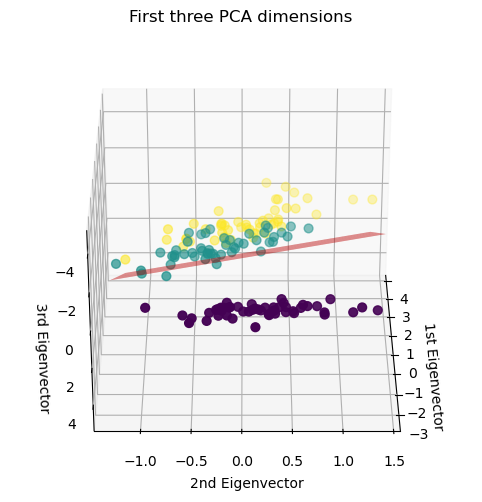

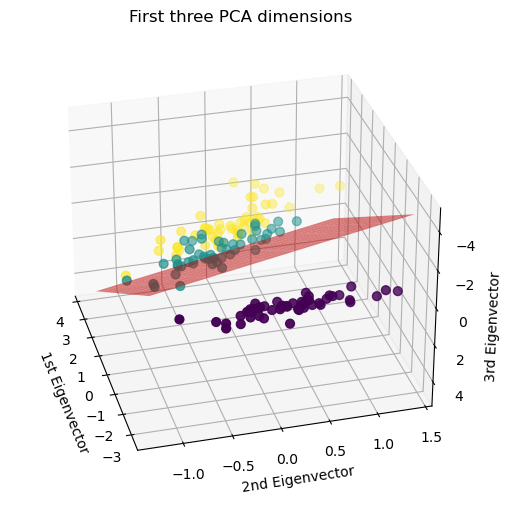

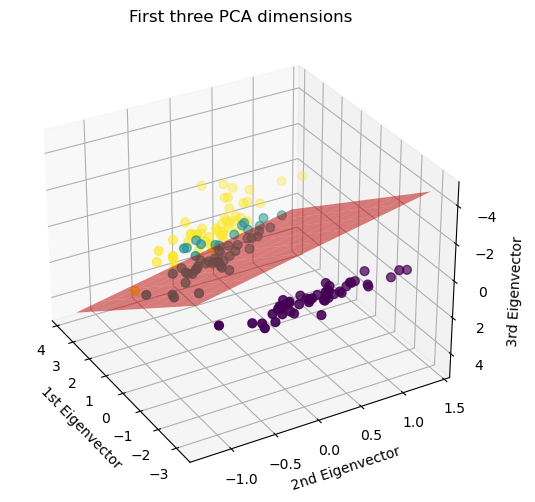

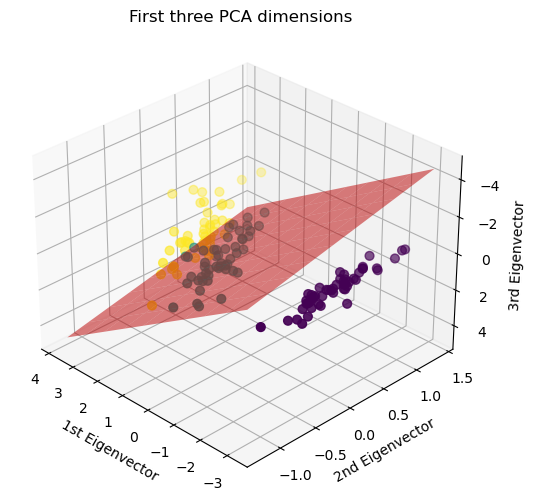

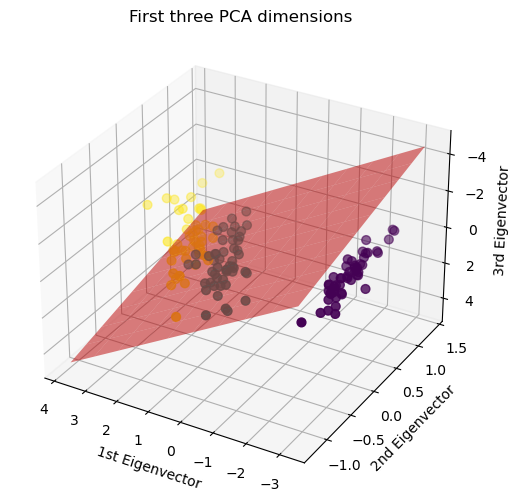

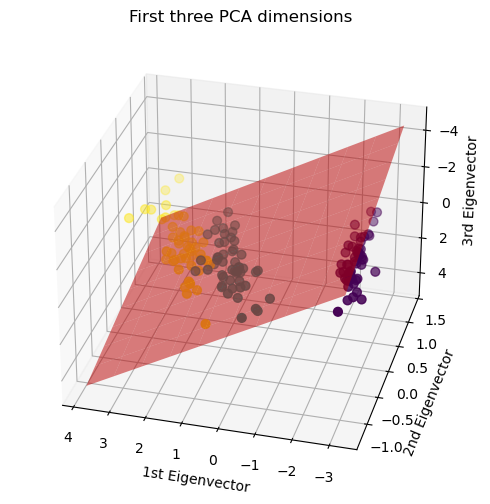

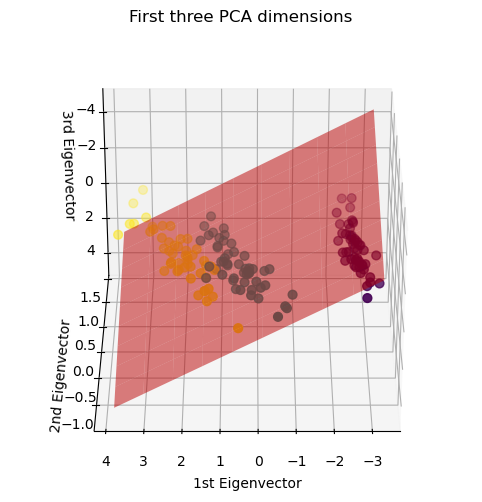

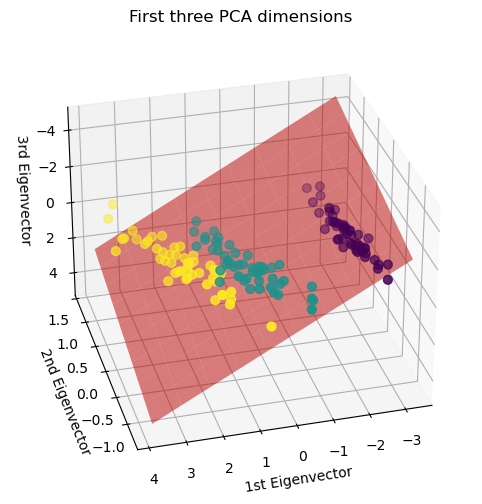

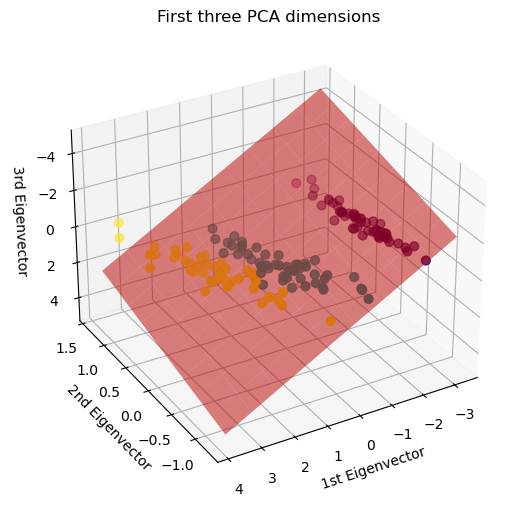

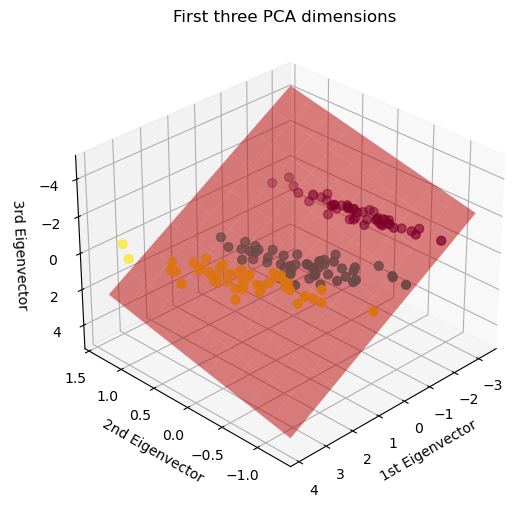

In [307]:
import numpy as np

# Define the hyperplane
w = perceptron.weights
b = perceptron.bias
xx = np.linspace(X_reduced[:, 0].min(), X_reduced[:, 0].max(), 10)
yy = np.linspace(X_reduced[:, 1].min(), X_reduced[:, 1].max(), 10)
xx, yy = np.meshgrid(xx, yy)
zz = (-w[0] * xx - w[1] * yy - b) / w[2]
for i in range(150):
     if((i % 15) == 0):
          # Plot the data points, hyperplane, and contour
          fig = plt.figure(1, figsize=(8, 6))
          ax = fig.add_subplot(111, projection="3d", elev=-150, azim=i)

          # Scatter plot for data points
          ax.scatter(
          X_reduced[:, 0],
          X_reduced[:, 1],
          X_reduced[:, 2],
          c=iris.target,
          s=40,
          )

          # Plot the hyperplane
          ax.plot_surface(xx, yy, zz, alpha=0.5, color='r')

          # Setting labels
          ax.set_title("First three PCA dimensions")
          ax.set_xlabel("1st Eigenvector")
          ax.set_ylabel("2nd Eigenvector")
          ax.set_zlabel("3rd Eigenvector")

          plt.show()
